In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)


In [3]:
df = pd.read_csv('data/Week2_challenge_data_source.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,04/04/2019 12:01,770.0,25/04/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,09/04/2019 13:04,235.0,25/04/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,09/04/2019 17:42,1.0,25/04/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,10/04/2019 0:31,486.0,25/04/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,12/04/2019 20:10,565.0,25/04/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df.shape

(150001, 55)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,149209.000000,6.852700e+04,6.819100e+04,1.500000e+05,1.500000e+05,1.500000e+05,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000,149246.000000,149208.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082017e+14,4.188282e+10,4.847454e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.144710e+08,3.242301e+06,1.829177e+06,1.408880e+06,1.046091e+08,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893170e+18,288.611834,288.097653,8.103762e+04,2.149289e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,6.215233,4.159538,4.828890,4.634285,3.225176,1.624523,1.295396,9.631946e+08,1.957064e+07,5.696395e+06,4.643231e+06,8.103761e+07,2546.524440,1445.365032,1842.162008,1219.112287,1946.387608,993.349688,9171.609010,10160.324314,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917540e+18,0.000000,0.000000,7.142000e+03,2.040470e+14,3.360100e+10,4.400150e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349880e+18,250.000000,251.000000,5.744050e+04,2.082010e+14,3.365130e+10,3.546070e+13,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.124035e+05,2.432200e+04,1.487775e+04,2.153975e+04,5.744079e+07,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000,87.000000,106.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156

## Task 1.
###  Full User Overview

>> Check for missing Values

In [7]:
# the data will need alot of cleaning maybe not so much 
# let get started

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [8]:
missing_values_table(df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


,Missing Values,% of Total Values
Nb of sec with 37500B < Vol UL,130254,86.8
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6
Nb of sec with 125000B < Vol DL,97538,65.0
TCP UL Retrans. Vol (Bytes),96649,64.4
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9
TCP DL Retrans. Vol (Bytes),88146,58.8
HTTP UL (Bytes),81810,54.5
HTTP DL (Bytes),81474,54.3


>> All the columns 55 in total has missing value with the least count being 7. Based on set principal i decide to drop all column with more than 40% missing Values.

>> identifying the top 10 handsets used by the customers. There are about 1012 diffrent handset in the data which are the top most used by the customers?

In [9]:
print('Top 10 Handsets used by customers')
df.groupby(['Handset Type']).size().reset_index(name='Count').\
                        sort_values(by='Count', ascending=False)[:10]

Top 10 Handsets used by customers


,Handset Type,Count
316,Huawei B528S-23A,19752
53,Apple iPhone 6S (A1688),9419
49,Apple iPhone 6 (A1586),9023
1395,undefined,8987
59,Apple iPhone 7 (A1778),6326
73,Apple iPhone Se (A1723),5187
66,Apple iPhone 8 (A1905),4993
78,Apple iPhone Xr (A2105),4568
955,Samsung Galaxy S8 (Sm-G950F),4520
75,Apple iPhone X (A1901),3813


In [10]:
top_10_handset = pd.DataFrame(df['Handset Type'].value_counts()[:10])
top_10_handset = top_10_handset.reset_index()
top_10_handset = top_10_handset.rename(columns={'index':'Handset Type', 'Handset Type': 'Counts'})

In [11]:
print(f'The top 10 most used hanset by the customers are')
top_10_handset

The top 10 most used hanset by the customers are


,Handset Type,Counts
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326
5,Apple iPhone Se (A1723),5187
6,Apple iPhone 8 (A1905),4993
7,Apple iPhone Xr (A2105),4568
8,Samsung Galaxy S8 (Sm-G950F),4520
9,Apple iPhone X (A1901),3813


>> identify the top 3 handset manufacturers. There are 133 diffrent Manufacturers of Handsets in the data. Who has the most count of handset manufactured in the data?

In [12]:
top_3_manufactures = pd.DataFrame(df['Handset Manufacturer'].value_counts()[:3])
top_3_manufactures.index.name = 'Handset Manufacturer'
top_3_manufactures.columns = ['Number of Handset Manufactured']
top_3_manufactures.reset_index(inplace=True)

In [13]:
print('The top 3 Handset Manufacturers and the count of handset manufactured')
top_3_manufactures

The top 3 Handset Manufacturers and the count of handset manufactured


,Handset Manufacturer,Number of Handset Manufactured
0,Apple,59565
1,Samsung,40839
2,Huawei,34423


>> identify the top 5 handsets per handset manufacturer

In [14]:
top_5_manufacturers = ['Apple', 'Samsung', 'Huawei']
for manufacturer in top_5_manufacturers: 
    data = df[df['Handset Manufacturer'] == manufacturer]
    top_5_handset_by_manufacturer = data.groupby(['Handset Type'])['Handset Type'].\
                        size().\
                        reset_index(name='Count').\
                        sort_values(by='Count', ascending=False)
    print(f'#################### {manufacturer} #######################')
    print(top_5_handset_by_manufacturer[:5], end='\n\n')
    print('------------------------------------------------------------')

#################### Apple #######################
               Handset Type  Count
35  Apple iPhone 6S (A1688)   9419
31   Apple iPhone 6 (A1586)   9023
41   Apple iPhone 7 (A1778)   6326
55  Apple iPhone Se (A1723)   5187
48   Apple iPhone 8 (A1905)   4993

------------------------------------------------------------
#################### Samsung #######################
                     Handset Type  Count
123  Samsung Galaxy S8 (Sm-G950F)   4520
6      Samsung Galaxy A5 Sm-A520F   3724
56    Samsung Galaxy J5 (Sm-J530)   3696
48    Samsung Galaxy J3 (Sm-J330)   3484
121  Samsung Galaxy S7 (Sm-G930X)   3199

------------------------------------------------------------
#################### Huawei #######################
                       Handset Type  Count
13                 Huawei B528S-23A  19752
34                     Huawei E5180   2079
113  Huawei P20 Lite Huawei Nova 3E   2021
112                      Huawei P20   1480
154                  Huawei Y6 2018    997

-----

> <u>A short interpretation and recommendation to marketing teams</u> 

From the Above Analysis, The most used handset by customer is **Huawei B528S-23A** Manufactured by **Huawei**, while the manufacturer with the highest counts of handset made is **Apple** with **59565** Handsets. Given what was found out Apple Handset are not prefered or mostly used among customers <br><br> More focus should be given to Samsung and Huawei Manufacturers, a promotion offer or discount. Handset like **Huawei B528S-23A** is most used among all other **Huawei Handsets**

### Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications¶

>> There are 7 different Applications 
>> 1. Netflix
>> 2. Google
>> 3. YouTube
>> 4. Socia Media
>> 5. Email
>> 6. Gaming
>> 7. Other

In [15]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


> Aggregate per user
>> number of xDR sessions 

In [16]:
df['MSISDN/Number'].nunique(), df['Bearer Id'].nunique()

(106856, 9)

In [17]:
df.groupby('MSISDN/Number')['Bearer Id'].count().reset_index(name='Count xDR sessions').\
            sort_values(by='Count xDR sessions', ascending=False)[:20]

,MSISDN/Number,Count xDR sessions
13526,3.362632e+10,18
13180,3.362578e+10,17
6437,3.361489e+10,17
37052,3.365973e+10,16
76363,3.367588e+10,15
92923,3.376054e+10,15
65118,3.366716e+10,13
92577,3.376041e+10,12
1279,3.360452e+10,12
666,3.360313e+10,12


>> Session duration 

In [18]:
df.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index(name='Session Duration').\
            sort_values(by='Session Duration', ascending=False)[:20]

,MSISDN/Number,Session Duration
13180,3.362578e+10,18553754.0
6437,3.361489e+10,9966898.0
92923,3.376054e+10,9279434.0
13526,3.362632e+10,8791927.0
65118,3.366716e+10,8744914.0
50281,3.366284e+10,6614270.0
57160,3.366469e+10,6288730.0
666,3.360313e+10,6287761.0
66029,3.366746e+10,5649882.0
92577,3.376041e+10,5321667.0


>>  total download (DL) and upload (UL) data 

In [19]:
df['Total Download and Upload'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

In [20]:
df.groupby('MSISDN/Number')['Total DL (Bytes)'].sum().reset_index(name='Total Download').\
            sort_values(by='Total Download', ascending=False)[:20]

,MSISDN/Number,Total Download
6437,3.361489e+10,8.156743e+09
92923,3.376054e+10,7.811295e+09
13180,3.362578e+10,7.770043e+09
76363,3.367588e+10,7.309542e+09
13526,3.362632e+10,7.301517e+09
37052,3.365973e+10,7.081602e+09
63028,3.366646e+10,6.903440e+09
92577,3.376041e+10,6.610852e+09
57241,3.366471e+10,6.400774e+09
86455,3.369879e+10,6.010556e+09


In [21]:
df.groupby('MSISDN/Number')['Total UL (Bytes)'].sum().reset_index(name='Total Upload').\
            sort_values(by='Total Upload', ascending=False)[:20]

,MSISDN/Number,Total Upload
13180,3.362578e+10,729577380.0
92923,3.376054e+10,703478581.0
6437,3.361489e+10,689483001.0
13526,3.362632e+10,669650721.0
37052,3.365973e+10,624260321.0
76363,3.367588e+10,581568792.0
65118,3.366716e+10,566326364.0
86455,3.369879e+10,530343105.0
92577,3.376041e+10,521518890.0
94654,3.376127e+10,496467102.0


In [22]:
df.groupby('MSISDN/Number')['Total Download and Upload'].sum().reset_index(name='Total Download&Upload').\
            sort_values(by='Total Download&Upload', ascending=False)[:20]

,MSISDN/Number,Total Download&Upload
6437,3.361489e+10,8.846226e+09
92923,3.376054e+10,8.514774e+09
13180,3.362578e+10,8.499621e+09
13526,3.362632e+10,7.971167e+09
76363,3.367588e+10,7.891111e+09
37052,3.365973e+10,7.705863e+09
63028,3.366646e+10,7.308501e+09
92577,3.376041e+10,7.132371e+09
57241,3.366471e+10,6.872018e+09
86455,3.369879e+10,6.540899e+09


>> total data volume (in Bytes) during this session for each application 

In [23]:
application = ['Social Media', 'Email', 'Youtube', 'Netflix', 'Google', 'Gaming', 'Other']

for app in application:
    df[f'Total Session {app}'] = df[f'{app} DL (Bytes)'] + df[f'{app} UL (Bytes)']

 >>> Aggregate Total Session Socia Media

In [24]:
df.groupby('MSISDN/Number')['Total Session Social Media'].sum().reset_index(name='Total Session Social Media').\
            sort_values(by='Total Session Social Media', ascending=False)[:20]

,MSISDN/Number,Total Session Social Media
13526,3.362632e+10,43374779.0
92923,3.376054e+10,39783189.0
37052,3.365973e+10,35412358.0
6437,3.361489e+10,28294544.0
13180,3.362578e+10,27135500.0
65118,3.366716e+10,24247850.0
106137,3.378632e+10,23974919.0
70960,3.366907e+10,23800834.0
666,3.360313e+10,23077825.0
31331,3.365849e+10,23000066.0


 >>> Aggregate Total Session Email

In [25]:
df.groupby('MSISDN/Number')['Total Session Email'].sum().reset_index(name='Total Session Email').\
            sort_values(by='Total Session Email', ascending=False)[:20]

,MSISDN/Number,Total Session Email
13526,3.362632e+10,42418782.0
6437,3.361489e+10,40788634.0
13180,3.362578e+10,40633966.0
106137,3.378632e+10,36310123.0
37052,3.365973e+10,35999792.0
92923,3.376054e+10,33693767.0
76363,3.367588e+10,31514421.0
60087,3.366546e+10,30417885.0
65118,3.366716e+10,30335796.0
86455,3.369879e+10,29059042.0


 >>> Aggregate Total Session Gaming

In [26]:
df.groupby('MSISDN/Number')['Total Session Gaming'].sum().reset_index(name='Total Session Gaming').\
            sort_values(by='Total Session Gaming', ascending=False)[:20]

,MSISDN/Number,Total Session Gaming
6437,3.361489e+10,7.749432e+09
92923,3.376054e+10,7.461045e+09
13180,3.362578e+10,7.326673e+09
76363,3.367588e+10,6.970568e+09
13526,3.362632e+10,6.887572e+09
37052,3.365973e+10,6.725559e+09
63028,3.366646e+10,6.646303e+09
92577,3.376041e+10,6.268620e+09
57241,3.366471e+10,6.103856e+09
86455,3.369879e+10,5.753743e+09


 >>> Aggregate Total Session YouTube

In [27]:
df.groupby('MSISDN/Number')['Total Session Youtube'].sum().reset_index(name='Total Session YouTube').\
            sort_values(by='Total Session YouTube', ascending=False)[:20]

,MSISDN/Number,Total Session YouTube
13180,3.362578e+10,452958769.0
92923,3.376054e+10,396289198.0
6437,3.361489e+10,394370218.0
13526,3.362632e+10,374483047.0
76363,3.367588e+10,317410572.0
65118,3.366716e+10,315231310.0
13994,3.362708e+10,308790774.0
92577,3.376041e+10,303169107.0
86455,3.369879e+10,302661958.0
666,3.360313e+10,284090139.0


 >>> Aggregate Total Session Netflix

In [28]:
df.groupby('MSISDN/Number')['Total Session Netflix'].sum().reset_index(name='Total Session Netflix').\
            sort_values(by='Total Session Netflix', ascending=False)[:20]

,MSISDN/Number,Total Session Netflix
37052,3.365973e+10,399519079.0
6437,3.361489e+10,361401046.0
13180,3.362578e+10,356980607.0
92923,3.376054e+10,334643269.0
13526,3.362632e+10,328725740.0
92577,3.376041e+10,318347546.0
65118,3.366716e+10,313939488.0
76363,3.367588e+10,309093159.0
106137,3.378632e+10,305939790.0
94654,3.376127e+10,292091341.0


 >>> Aggregate Total Session Other

In [29]:
df.groupby('MSISDN/Number')['Total Session Other'].sum().reset_index(name='Total Session Other').\
            sort_values(by='Total Session Other', ascending=False)[:20]

,MSISDN/Number,Total Session Other
13526,3.362632e+10,8.167878e+09
6437,3.361489e+10,7.639264e+09
76363,3.367588e+10,6.798515e+09
13180,3.362578e+10,6.354583e+09
666,3.360313e+10,6.326671e+09
37052,3.365973e+10,6.317415e+09
13936,3.362695e+10,5.305448e+09
13994,3.362708e+10,5.117791e+09
94654,3.376127e+10,5.077779e+09
30715,3.365836e+10,5.013651e+09


 >>> Aggregate Total Session Google

In [30]:
df.groupby('MSISDN/Number')['Total Session Google'].sum().reset_index(name='Total Session Google').\
            sort_values(by='Total Session Google', ascending=False)[:20]

,MSISDN/Number,Total Session Google
13526,3.362632e+10,152191852.0
13180,3.362578e+10,142307915.0
6437,3.361489e+10,127973787.0
92923,3.376054e+10,123223099.0
37052,3.365973e+10,116516345.0
106137,3.378632e+10,110254484.0
76363,3.367588e+10,109860502.0
65118,3.366716e+10,105032696.0
94654,3.376127e+10,97089988.0
86313,3.369876e+10,91935151.0


> Task 1.2 - Conduct an exploratory data analysis on those data & communicate useful insights

>>> Check and FIx Missing Values

In [31]:
# Fix Missing Data
missing_values_table(df)

Your selected dataframe has 63 columns.
There are 42 columns that have missing values.


,Missing Values,% of Total Values
Nb of sec with 37500B < Vol UL,130254,86.8
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6
Nb of sec with 125000B < Vol DL,97538,65.0
TCP UL Retrans. Vol (Bytes),96649,64.4
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9
TCP DL Retrans. Vol (Bytes),88146,58.8
HTTP UL (Bytes),81810,54.5
HTTP DL (Bytes),81474,54.3


 MSISDN/Number should be treated as a categorical column. I choose this because it is suppose to represent each customer in the data and to fill the missing values in the column with a mean value would implies am creating a new customer hence i will fill with mode to represent all missing values in MSISDN/Number. The same idea also applies to Bearer Id.

In [32]:
df[df['Avg Bearer TP UL (kbps)'].isna()== True].index

Int64Index([150000], dtype='int64')

In [33]:
df['MSISDN/Number'].fillna(df['MSISDN/Number'].mode()[0], inplace=True)
df['Bearer Id'].fillna(df['Bearer Id'].mode()[0], inplace=True)

# Handset Manufacturer and Type are both Categorical in nature so i replace all nans with mode

df['Handset Manufacturer'].fillna(df['Handset Manufacturer'].mode()[0], inplace=True)
df['Handset Type'].fillna(df['Handset Type'].mode()[0], inplace=True)

# According to the rule of statistics and expert's saying if a column has just a single missing entry
# such entry can be removed. In another saying of experts, it said that if a column has more than
# 35 - 40% of it entry missing, So all column with more than 40% entry missing will be dropped.
# Side Note most of them do not contribute to anything regarding our analysis

#### Drop 
df.drop(150000, axis=0, inplace=True)

In [34]:
# Fix Missing Data
missing_values_table(df)

Your selected dataframe has 63 columns.
There are 25 columns that have missing values.


,Missing Values,% of Total Values
Nb of sec with 37500B < Vol UL,130253,86.8
Nb of sec with 6250B < Vol UL < 37500B,111842,74.6
Nb of sec with 125000B < Vol DL,97537,65.0
TCP UL Retrans. Vol (Bytes),96648,64.4
Nb of sec with 31250B < Vol DL < 125000B,93585,62.4
Nb of sec with 1250B < Vol UL < 6250B,92893,61.9
Nb of sec with 6250B < Vol DL < 31250B,88316,58.9
TCP DL Retrans. Vol (Bytes),88145,58.8
HTTP UL (Bytes),81809,54.5
HTTP DL (Bytes),81473,54.3


Important Features with missing entries have been fixed

>>> Outlier Detection

Since there are lots of columns and many observations, doing boxplot or scatterplot wont be the most efficient ways to get rid of them, so i decided to use the statistical method of getting rid of outliers. Using the IQR

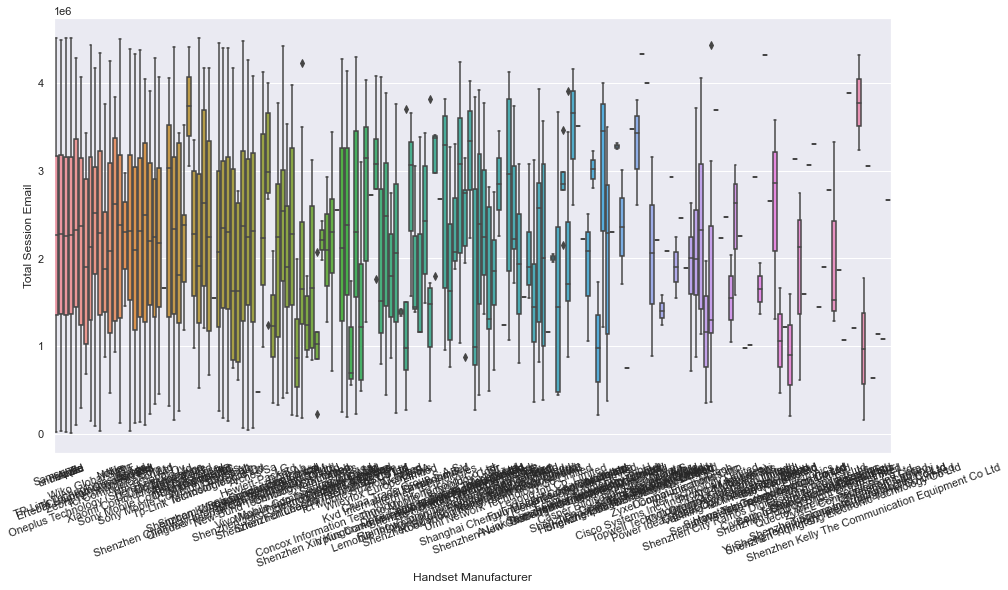

In [42]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df,  x='Handset Manufacturer', y='Total Session Email')
plt.xticks(rotation=20)
plt.show()

In [43]:
print('Before Oulier Dropping: ', df.shape)
mean = df['Total DL (Bytes)'].mean()
std = df['Total DL (Bytes)'].std()
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off
df = df[(df['Total DL (Bytes)'] < upper) & (df['Total DL (Bytes)'] > lower)]

print('After Dropping Outlier Significantly ', df.shape)

Before Oulier Dropping:  (150000, 63)
After Dropping Outlier Significantly  (150000, 63)


It seems Outlier is not Present

>> Describe all  relevant variables and associated data types (slide)

1. Total DL (Bytes) -->> Data volume (in Bytes) received by the MS during this session (IP layer + overhead) (float) <br>
2. Total UL (Bytes) -->> Data volume (in Bytes) sent by the MS during this session (IP layer + overhead) (float) <br>
3. All Application Columns like **Google DL (Bytes), Netflix UL (Bytes), Youtube UL (Bytes), Social Media DL, Other UL, Gaming DL** etc represent data volume (in Bytes) sent (UL) and Received (DL) by the MS during this session. (float) <br>
4. Handset Manufacturer and Handset Type -->> Manufacturers and Handset type of the mobile device. they are both (object or categorical) <br>
5. MSISDN/Number -->> Represent Customer Number. it is used to know the diffrent number of customer in the data (float) <br>
6. Dur. (ms) -->> Total Duration of the xDR (in miliseconds) xDr means Data session detail record (float)<br>
7. bearer id  -->>> xDr session identifier



>> Analyze the basic metrics in your DataMart (explain) & their importance for                       
the global objective. 

1. The global objective is to enable our rich investor to make good decision based on the result of the analysis. As such, the important metrics and Data features include MSISDN/Number count. The **MSISDN/Number** count will tell us how many customers there are that are using the telco services. If many we may suggest to the investor to buy the telco company. <br> <br>

2. <u>Dur. (ms)</u> Duration in milisecond tells us how often customers spends time using the data session to browse either of the applications like Youtube, Google Netflix etc. This also will favour our decision to recommend the buy option to the investor if the value is high. Based on the analysis, customers spends more time using the Gaming app on the xDr than any other application. This suggest that priority should be given to Gaming app than any other app as the influence is almost doubled all other application. <br> <br>

3. <u>Handset Manufacturers</u> like **Apple** produced the most handset by **count** but it is not the most used has **Huawei** with the handset type Huawei B528S-23A is the most used among the customers having a total count of close to 10 thousand users. Samsung is the 2nd top handset Manufacturers. Huawei B528S-23A is known for it lesser price and high graphics display and easy to use with a sleek design when compare to the likes of Apple Iphone 6s and Samsung which are both expensive and has small screen sizes. <br> <br>

4. <u>Data Volume Download and Upload</u> is another important metric to consider as it shows how data is being used both for Download that is when streaming a Video from applications like Netflix or Youtube to Upload when sending files to the server or plaaying online games from the Gaming application. This will inform us on what to focus and which application to focus on when the company is acquired.

>>Conduct a Non-Graphical Univariate Analysis by computing position &                 
dispersion parameters for each quantitative variable and provide useful                 
interpretation. 

In [44]:
# i will start by selecting the important quantitative features from our general features
numerical_features = df.select_dtypes(include=['float', 'int'])
numerical_features.shape

(150000, 58)

In [45]:
important_features = ['Total Session Google', 'Total Session Email', 'Total Session Youtube',
                     'Total Session Other', 'Total Session Social Media', 'Total Session Netflix',
                     'Total Session Gaming', 'Total Download and Upload', 'Dur. (ms)', 
                      ]
# dispersion
numerical_features[important_features].describe()

,Total Session Google,Total Session Email,Total Session Youtube,Total Session Other,Total Session Social Media,Total Session Netflix,Total Session Gaming,Total Download and Upload,Dur. (ms)
count,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05
mean,7.807295e+06,2.259102e+06,2.264348e+07,4.293653e+08,1.828250e+06,2.262861e+07,4.303331e+08,4.957646e+08,1.046086e+05
std,3.516432e+06,1.071113e+06,9.246831e+06,2.432689e+08,1.035650e+06,9.260851e+06,2.440207e+08,2.443818e+08,8.103762e+04
min,4.033000e+04,8.359000e+03,7.890300e+04,1.490450e+05,1.563000e+03,9.843200e+04,3.063580e+05,2.895611e+07,7.142000e+03
25%,4.943592e+06,1.359343e+06,1.599846e+07,2.185509e+08,9.322132e+05,1.597944e+07,2.187274e+08,2.844759e+08,5.744050e+04
50%,7.812852e+06,2.263574e+06,2.266181e+07,4.299923e+08,1.826442e+06,2.263559e+07,4.316152e+08,4.968611e+08,8.639900e+04
75%,1.068285e+07,3.159825e+06,2.929266e+07,6.399281e+08,2.727489e+06,2.929060e+07,6.414161e+08,7.065059e+08,1.324302e+05
max,1.552878e+07,4.518036e+06,4.519008e+07,8.595209e+08,3.650861e+06,4.519815e+07,8.592028e+08,9.559848e+08,1.859336e+06


>> Interpretation

>> On a Average (mean) Total Session Gaming has the highest data volume with 4.3billion followed by Other Application and Total Session Google.
1. On median, The data are normally distributed. This was arrived at when the diffrence between the mean and median is little to close to zero
2. Duration per milisecond is not normally distributed. The diffrence between the mean and the median is large

>> Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings

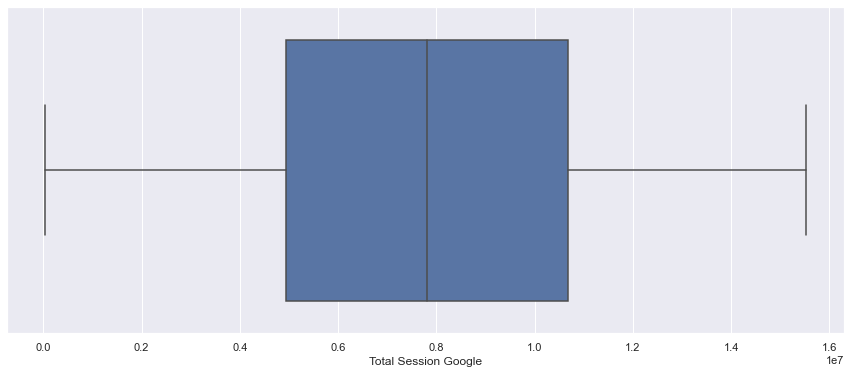

In [46]:
plt.figure(figsize=(15, 6))
sns.boxplot(df['Total Session Google'])

Text(0.5, 1.0, 'Violin and strip plot of Dur (ms) Distribution')

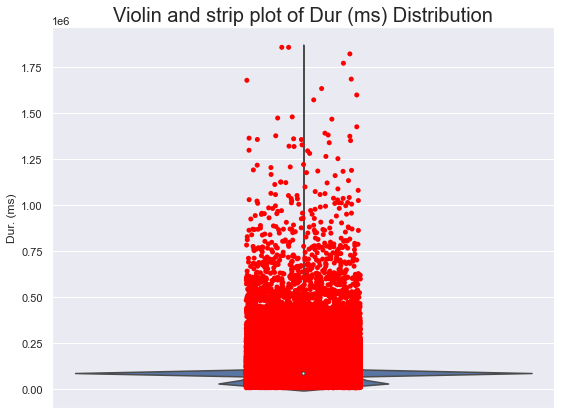

In [48]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=df, x='Dur. (ms)', orient='vert', color='red')
sns.violinplot(data=df, x='Dur. (ms)', orient='vert')
plt.title('Violin and strip plot of Dur (ms) Distribution', size=20)

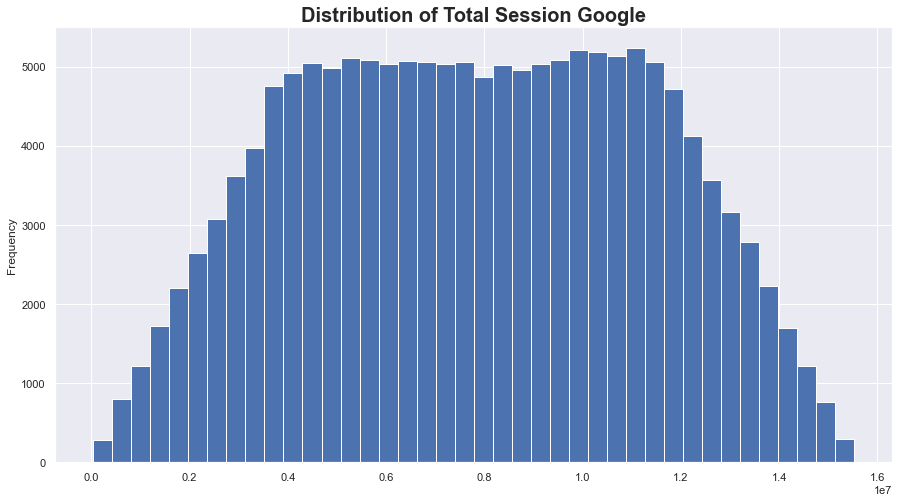

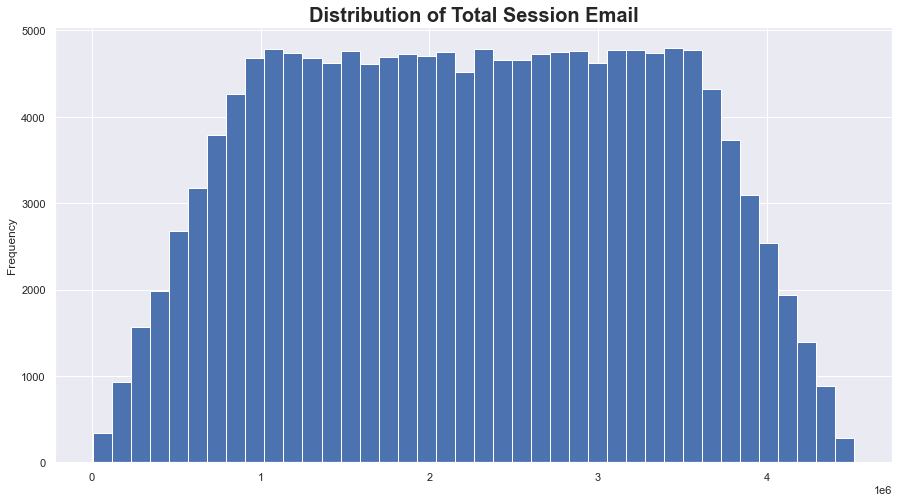

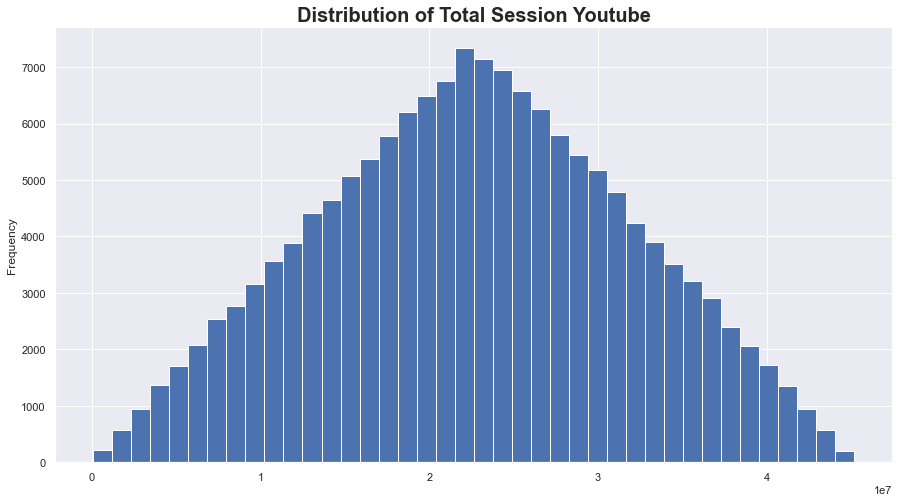

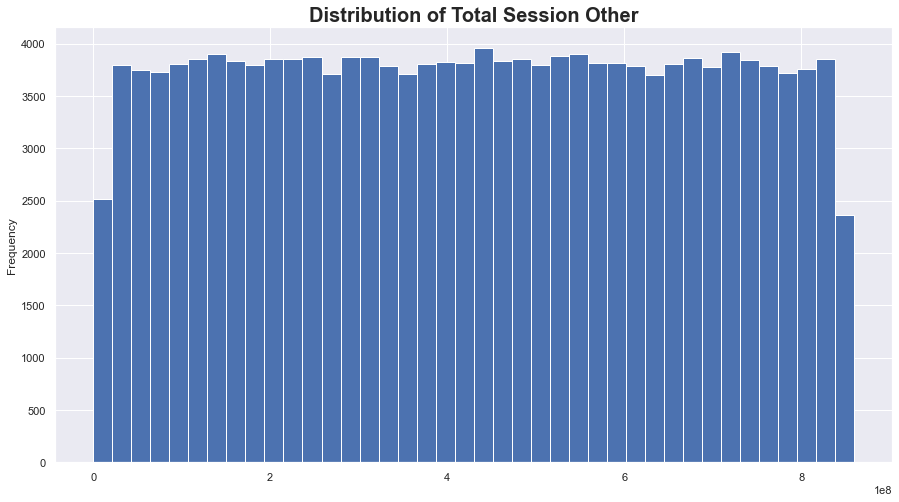

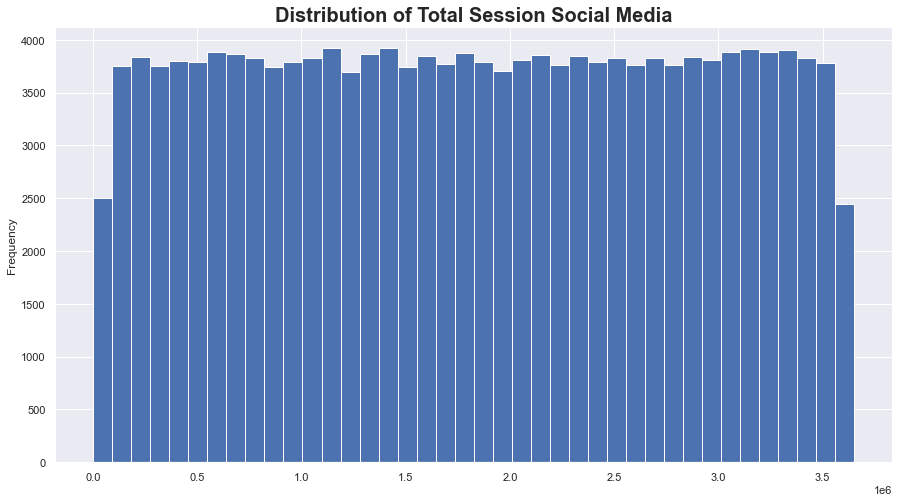

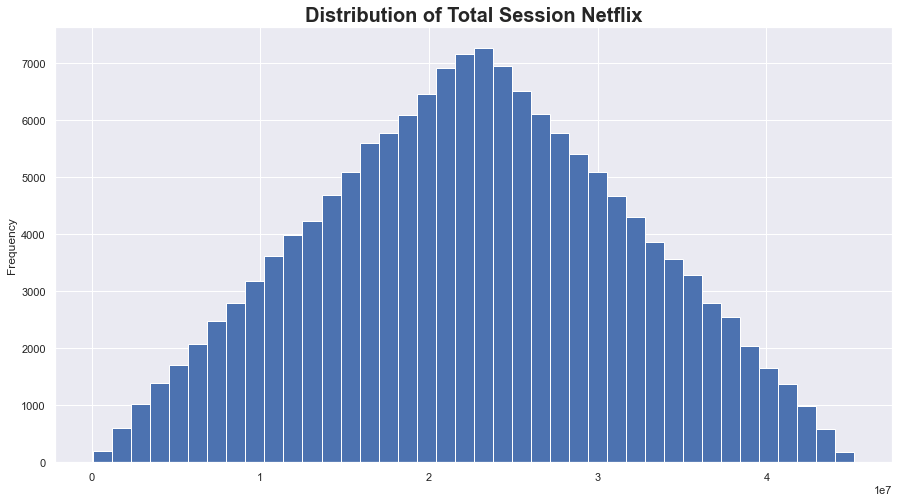

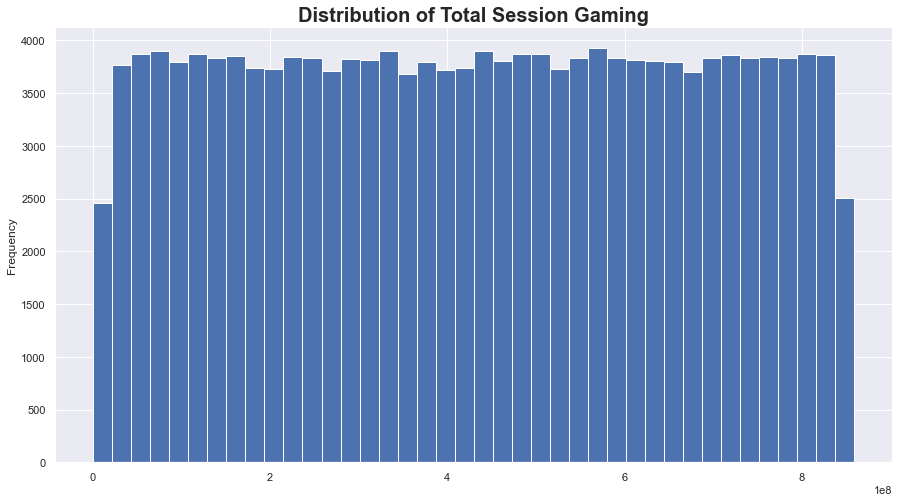

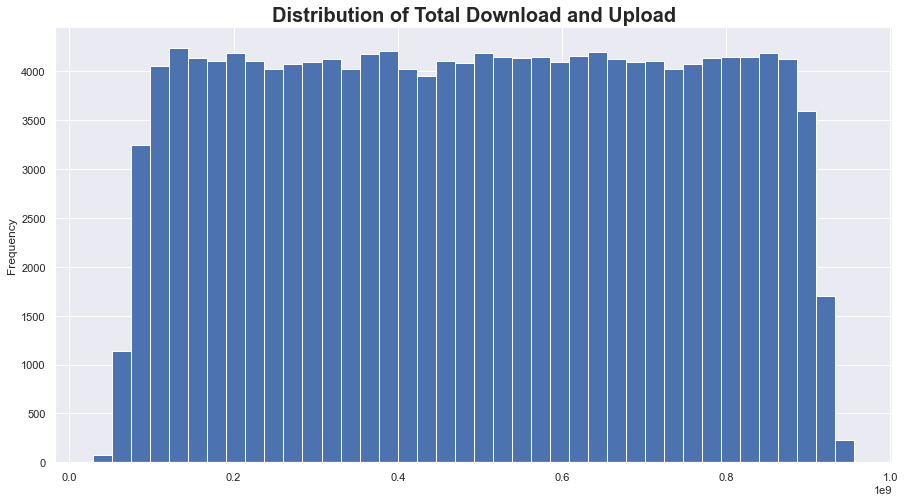

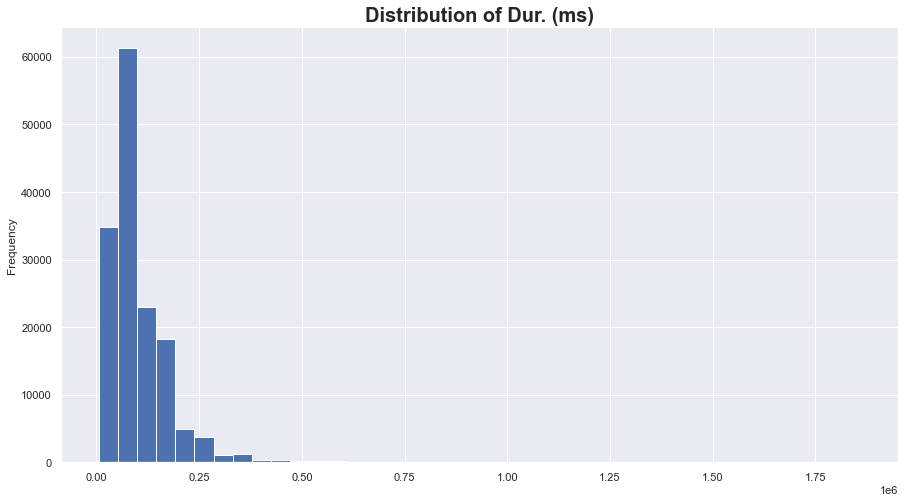

In [49]:
for column in important_features:
#     plt.figure(figsize=())
    numerical_features[column].plot.hist(bins=40, color='b', figsize=(15, 8))
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

>> The chart above confirms the saying that only Dur (ms) is not normally distributed. Normal Distribution is a histogram chart that has a bell shape. like the Total Session Netflix or the rest of the quatitative variables.

>> 1. Bivariate Analysis – explore the relationship between each application &                   
the total DL+UL data using appropriate methods and interpret your                   
findings.

The Most Used and highly recommended chart to compare relationships is the **scatter plot**

In [53]:
print(important_features)

['Total Session Google', 'Total Session Email', 'Total Session Youtube', 'Total Session Other', 'Total Session Social Media', 'Total Session Netflix', 'Total Session Gaming', 'Total Download and Upload', 'Dur. (ms)']


Since the data is large, a sample size of 10,000 would be selected and used to verify if there are any relationships

In [50]:
df_sample= df.sample(5000)

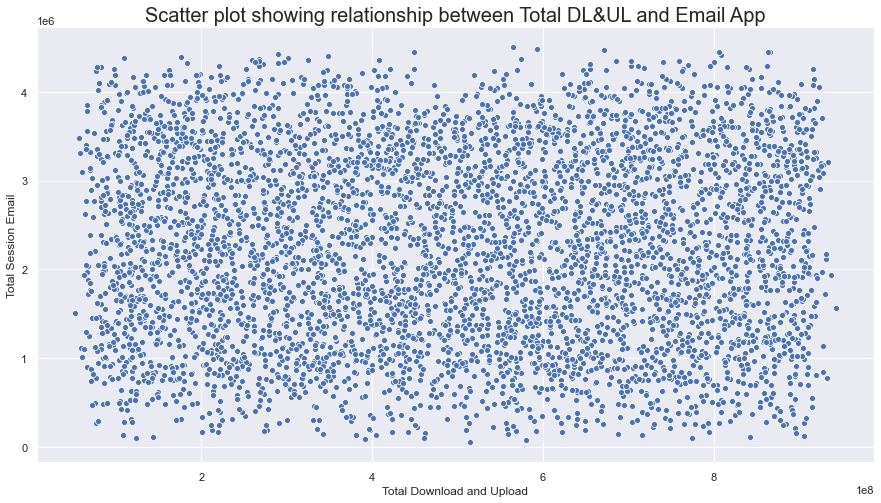

In [51]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = df_sample, x='Total Download and Upload', y='Total Session Email',
                )
plt.title('Scatter plot showing relationship between Total DL&UL and Email App', size=20)
plt.show()

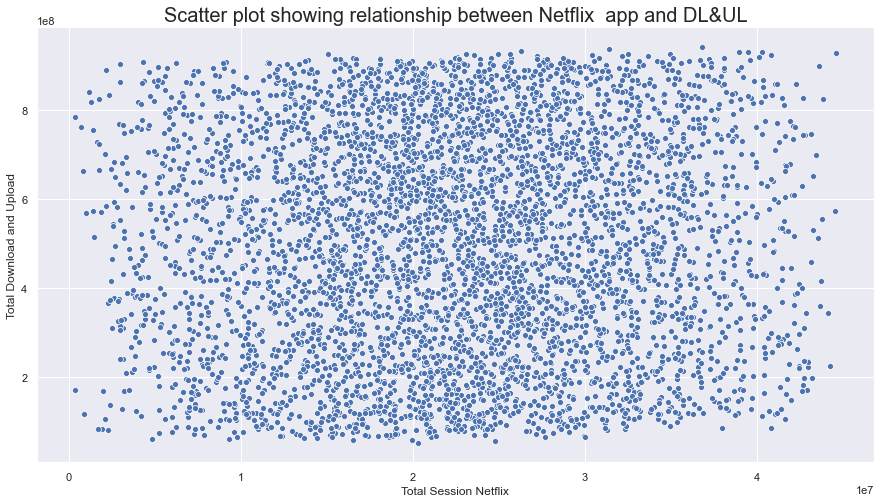

In [52]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = df_sample, x='Total Session Netflix', y='Total Download and Upload',
                )
plt.title('Scatter plot showing relationship between Netflix  app and DL&UL', size=20)
plt.show()


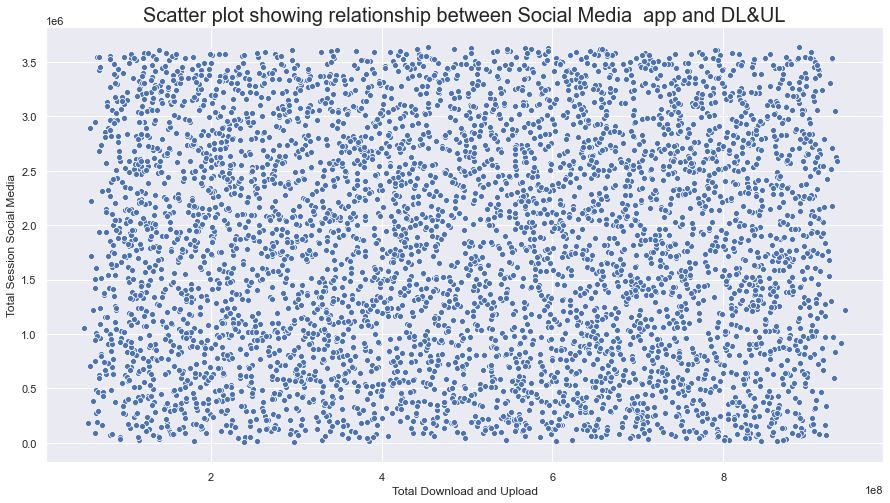

In [53]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = df_sample, x='Total Download and Upload', y='Total Session Social Media',
                )
plt.title('Scatter plot showing relationship between Social Media  app and DL&UL', size=20)
plt.show()


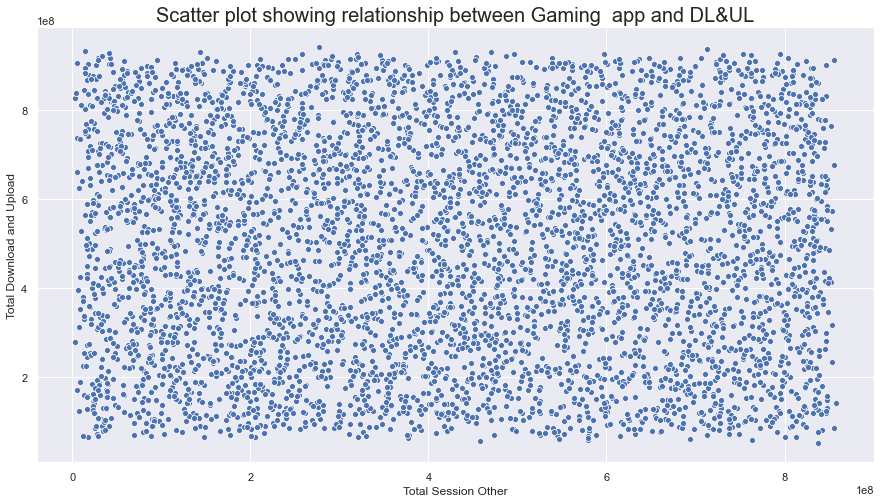

In [54]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = df_sample, x='Total Session Other', y='Total Download and Upload',
                )
plt.title('Scatter plot showing relationship between Gaming  app and DL&UL', size=20)
plt.show()


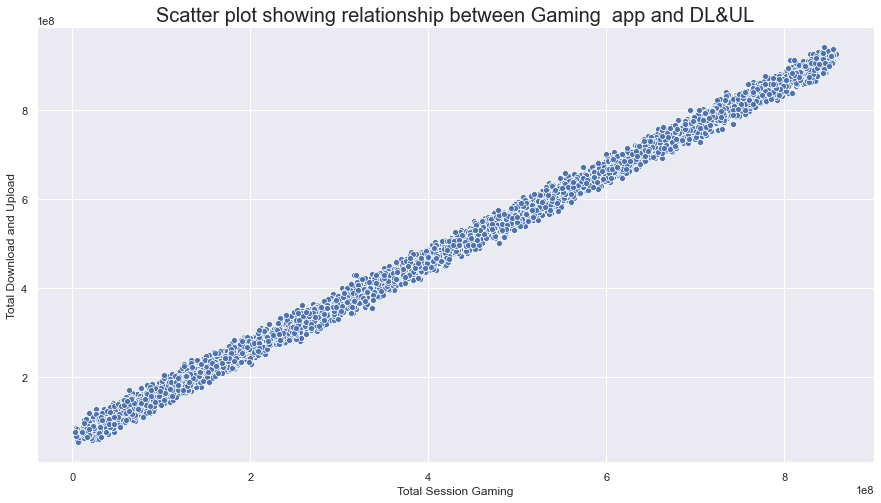

In [55]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = df_sample, x='Total Session Gaming', y='Total Download and Upload',
                )
plt.title('Scatter plot showing relationship between Gaming  app and DL&UL', size=20)
plt.show()


We can see that there is a linear relationship between Gaming Session and Total Download and Upload. They are linearly correlated. let verify it with a statistical approach

In [56]:
corr_game_DL_UL = df[['Total Download and Upload', 'Total Session Gaming']].corr()
corr_game_DL_UL

,Total Download and Upload,Total Session Gaming
Total Download and Upload,1.000000,0.998254
Total Session Gaming,0.998254,1.000000


From the result, it almost perfectly postively linearly correlated which says that **has the download&upload increases the gaming session also increases**

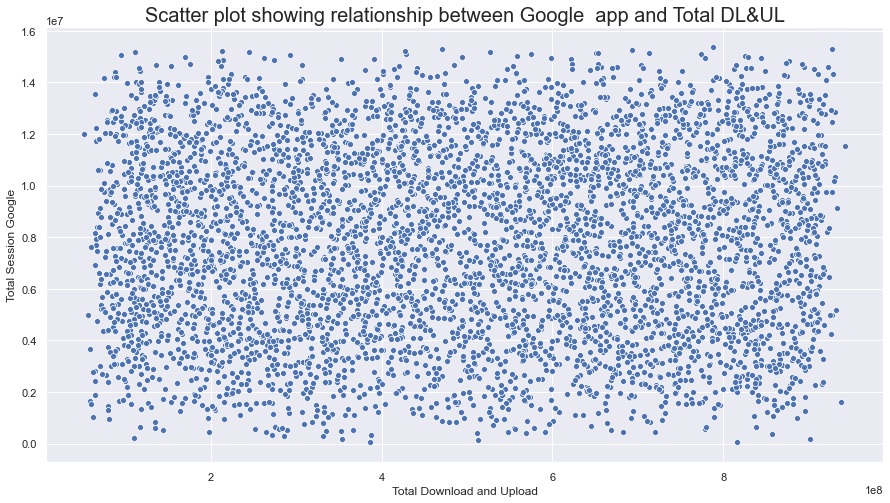

In [57]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = df_sample, x='Total Download and Upload', y='Total Session Google',
                )
plt.title('Scatter plot showing relationship between Google  app and Total DL&UL', size=20)
plt.show()


In [77]:
corr_google_DL_UL = df[['Total Download and Upload', 'Total Session Google']].corr()
corr_google_DL_UL

,Total Download and Upload,Total Session Google
Total Download and Upload,1.00000,0.01337
Total Session Google,0.01337,1.00000


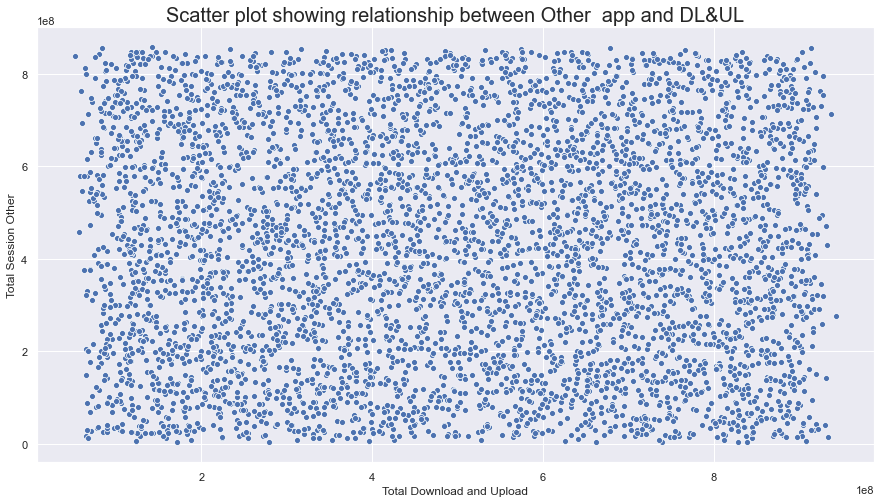

In [58]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = df_sample, x='Total Download and Upload', y='Total Session Other',
                )
plt.title('Scatter plot showing relationship between Other  app and DL&UL', size=20)
plt.show()


In [78]:
corr_other_DL_UL = df[['Total Download and Upload', 'Total Session Other']].corr()
corr_other_DL_UL

,Total Download and Upload,Total Session Other
Total Download and Upload,1.000000,-0.002443
Total Session Other,-0.002443,1.000000


There exist a negative correlation between the total download and upload and the other session application

>> Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data                         
(DL+UL) per decile class

In [59]:
# Get Total Duration Session for all Application
df['Total duration all session'] = df['Total Session Email'] + df['Total Session Gaming'] +df['Total Session Google'] + df['Total Session Other'] +df['Total Session Netflix'] + df['Total Session Social Media'] +df['Total Session Youtube']

# get copy of the original dataset
df1 = df.copy()

In [60]:
# sort the data with total duration in a higher to lower order
df1 = df1.sort_values('Total duration all session', ascending=False)

# get customer number, total duration and total dl and ul
df_decile = df1[['MSISDN/Number', 'Total duration all session', 'Total Download and Upload']]
df_decile.head()

,MSISDN/Number,Total duration all session,Total Download and Upload
38391,3.365094e+10,1.780674e+09,944863143.0
94379,3.366385e+10,1.772824e+09,929878474.0
70184,3.366556e+10,1.771882e+09,935701394.0
27298,3.360823e+10,1.769959e+09,934692904.0
105865,3.376016e+10,1.769330e+09,927501997.0


In [61]:
df_decile.reset_index().drop('index', axis=1, inplace=True)
# add a new column decile 
df_decile['Decile'] = 0

In [65]:
df_decile.iloc[:10, -1] = 1
df_decile.iloc[10:20, -1] = 2
df_decile.iloc[20:30, -1] = 3
df_decile.iloc[30:40, -1] = 4
df_decile.iloc[40:50, -1] = 5
df_decile.iloc[50:60, -1] = 6
df_decile.iloc[60:70, -1] = 7
df_decile.iloc[70:80, -1] = 8
df_decile.iloc[80:90, -1] = 9
df_decile.iloc[90:100, -1] = 10
df_decile.iloc[100:110, -1] = 11
df_decile.iloc[110:120, -1] = 12
df_decile.iloc[120:130, -1] = 13
df_decile.iloc[130:140, -1] = 14
df_decile.iloc[140:150, -1] = 15
df_decile.iloc[150:160, -1] = 16
df_decile.iloc[160:170, -1] = 17
df_decile.iloc[170:180, -1] = 18
df_decile.iloc[180:190, -1] = 19
df_decile.iloc[190:200, -1] = 20
df_decile.iloc[200:210, -1] = 21
df_decile.iloc[210:220, -1] = 22

c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [76]:
df_decile = df_decile[df_decile['Decile'] != 0]
decile_rank = df_decile.groupby('Decile')['Total Download and Upload'].mean()[:10].reset_index(name='Decile class').\
                sort_values(by='Decile class', ascending=False)
decile_rank

,Decile,Decile class
0,1,931135289.1
1,2,922684958.9
2,3,922179094.5
3,4,919078931.2
5,6,914712693.8
4,5,913619791.4
7,8,912113219.4
6,7,911264097.7
8,9,910445212.7
9,10,905824910.2


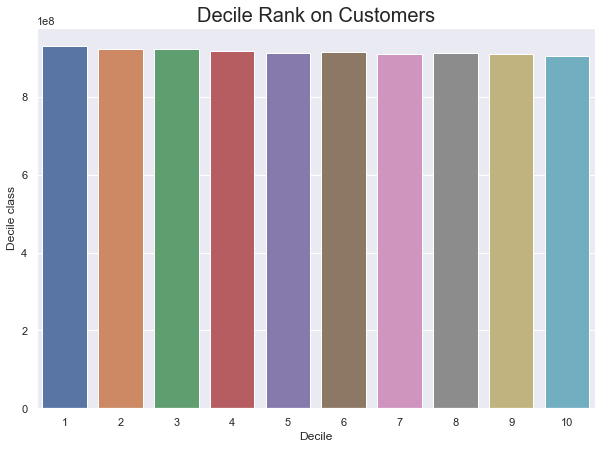

In [77]:
plt.figure(figsize=(10,7))
sns.barplot(data=decile_rank, x='Decile', y='Decile class')
plt.title('Decile Rank on Customers', size=20)
plt.show()

>> Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data               

In [78]:
corr_analysis = df[['Total Session Email', 'Total Session Gaming', 'Total Session Other', 
                    'Total Session Google', 'Total Session Social Media', 'Total Session Youtube',
                   'Total Session Netflix']].corr()
corr_analysis

,Total Session Email,Total Session Gaming,Total Session Other,Total Session Google,Total Session Social Media,Total Session Youtube,Total Session Netflix
Total Session Email,1.000000,-0.000644,-0.001299,-0.000412,0.004032,-0.002919,0.001029
Total Session Gaming,-0.000644,1.000000,-0.002661,-0.000994,0.001082,-0.002999,-0.003109
Total Session Other,-0.001299,-0.002661,1.000000,-0.001727,0.006065,0.002969,-0.009033
Total Session Google,-0.000412,-0.000994,-0.001727,1.000000,-0.001708,0.002277,-0.001902
Total Session Social Media,0.004032,0.001082,0.006065,-0.001708,1.000000,0.000548,0.001013
Total Session Youtube,-0.002919,-0.002999,0.002969,0.002277,0.000548,1.000000,0.002882
Total Session Netflix,0.001029,-0.003109,-0.009033,-0.001902,0.001013,0.002882,1.000000


 **Visualize the correlation with a plot**

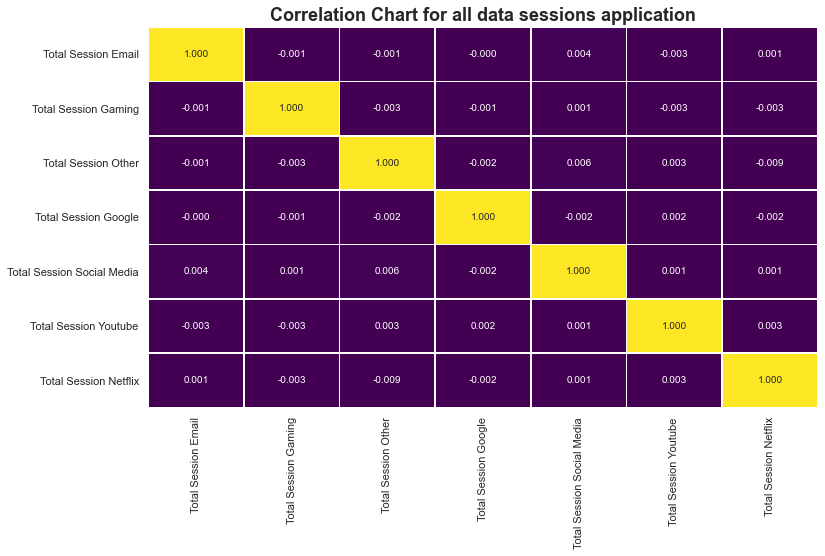

In [80]:
plt.figure(figsize=(12, 7))
sns.heatmap(corr_analysis, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.3f', linewidths=.7, cbar=False )
plt.title('Correlation Chart for all data sessions application', size=18, fontweight='bold')
plt.show()

From the chart, No variables is correlated to one another has they all have a no correletion and mostly it is negative which means that for example as the data session of Google increase the data session of Youtube decreases and vice versa. This we can say is expected because it is less likely that a 

>> Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum)

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)',
       'Total Download and Upload', 'Total Session Social Media',
       'Total Session Email', 'Total Session Youtube',
       'Total Session Netflix', 'Total Session Google',
       'Total Session Gaming', 'Total Session Other',
       'Total duration all session', 'Dur. (ms)']
X = df[X_data]
X_scaled = scaler.fit_transform(X)

In [164]:
# Employ PCA to find a subset of components, which explain the variance in the data.
from sklearn.decomposition import PCA
pca = PCA()

# Fit PCA with our standardized data.
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [165]:
# The attribute shows how much variance is explained by each of the 26 individual components.
pca.explained_variance_ratio_

array([1.77515679e-01, 9.79974702e-02, 9.17282368e-02, 7.73901484e-02,
       7.69619511e-02, 7.67307352e-02, 7.64649096e-02, 5.60450081e-02,
       3.88191082e-02, 3.86524666e-02, 3.85577991e-02, 3.84596578e-02,
       3.83945898e-02, 3.82617957e-02, 3.80204440e-02, 2.04072309e-31,
       1.00299433e-31, 7.99173257e-32, 6.58860681e-32, 3.84772006e-32,
       2.99725007e-32, 9.89692703e-33, 8.56512439e-33, 1.10286140e-33,
       1.10286140e-33, 1.07531236e-33])

Text(0, 0.5, 'Cumulative Explained Variance')

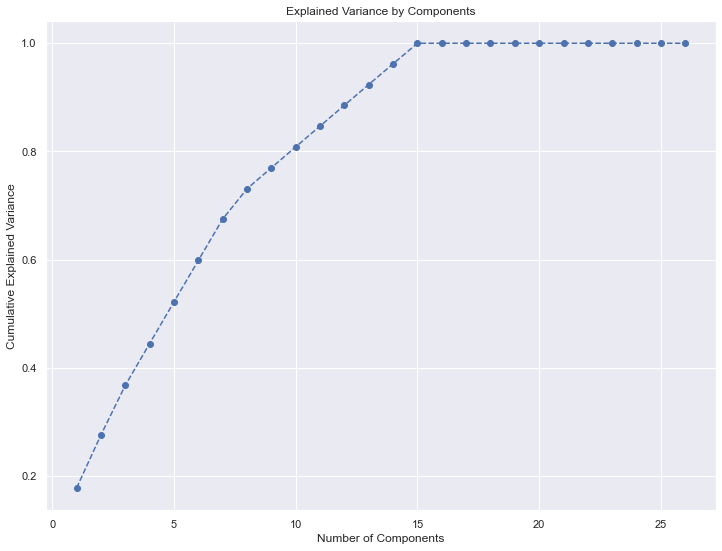

In [166]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,27), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [167]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph.
pca = PCA(n_components = 10)

In [168]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## ${\textbf{PCA Results}}$

In [169]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the 10 original features.
# The loadings are the correlations between the components and the original features. 
pca.components_

array([[ 3.96783404e-03, -4.02929702e-04,  4.66598383e-03,
         2.84753852e-03,  1.67949550e-03, -1.58837121e-03,
         1.12203961e-02,  9.73228925e-03,  8.88821224e-03,
         8.77236242e-03,  4.52584119e-01,  8.62027818e-03,
         1.04681707e-01,  6.08096982e-03,  1.69135843e-02,
         4.52900955e-01,  4.53238597e-01,  3.95981168e-03,
         1.22384953e-03,  1.48214227e-02,  1.24786912e-02,
         5.35445885e-03,  4.52655832e-01,  1.04773781e-01,
         3.95655885e-01,  3.63915568e-04],
       [-9.32925822e-03,  2.46774251e-03, -1.87897027e-02,
        -4.16047229e-02,  2.11236581e-03, -5.59843159e-03,
        -1.85145100e-01, -3.75812087e-01, -1.82431404e-01,
        -3.72440247e-01,  3.10208126e-02, -1.45664836e-01,
         1.56585800e-03, -1.43103613e-01, -5.48344172e-01,
         2.05990760e-02, -4.72303250e-03, -9.28249411e-03,
         6.31744512e-04, -3.92256306e-01, -3.88240012e-01,
        -3.17604568e-02,  2.81591710e-02, -1.23993725e-03,
        -2.24

In [170]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = X.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4',
                                    'Component 5', 'Component 6', 'Component 7', 'Component 8',
                                    'Component 9', 'Component 10' ])
df_pca_comp

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Download and Upload,Total Session Social Media,Total Session Email,Total Session Youtube,Total Session Netflix,Total Session Google,Total Session Gaming,Total Session Other,Total duration all session,Dur. (ms)
Component 1,0.00,-0.00,0.00,0.00,0.00,-0.00,0.01,0.01,0.01,0.01,0.45,0.01,0.10,0.01,0.02,0.45,0.45,0.00,0.00,0.01,0.01,0.01,0.45,0.10,0.40,0.00
Component 2,-0.01,0.00,-0.02,-0.04,0.00,-0.01,-0.19,-0.38,-0.18,-0.37,0.03,-0.15,0.00,-0.14,-0.55,0.02,-0.00,-0.01,0.00,-0.39,-0.39,-0.03,0.03,-0.00,-0.00,0.00
Component 3,-0.02,0.00,0.01,-0.00,0.00,0.00,-0.01,-0.01,0.02,0.02,0.15,0.00,-0.63,-0.01,0.00,0.15,0.15,-0.02,0.01,-0.01,0.03,0.01,0.15,-0.63,-0.34,0.00
Component 4,0.39,0.01,-0.25,-0.09,0.43,0.11,-0.13,-0.13,0.14,0.14,-0.00,0.00,0.00,0.01,0.00,-0.00,-0.00,0.39,0.45,-0.18,0.20,-0.27,-0.00,0.00,0.00,-0.00
Component 5,-0.19,-0.01,-0.52,-0.19,-0.30,-0.08,-0.11,-0.10,0.14,0.14,0.01,0.00,0.01,-0.00,-0.00,-0.00,-0.00,-0.19,-0.31,-0.14,0.20,-0.56,0.01,0.01,0.01,-0.00
Component 6,-0.48,-0.00,0.17,0.06,0.27,0.08,-0.20,-0.20,0.21,0.19,-0.01,-0.01,0.03,0.00,0.00,-0.01,-0.01,-0.48,0.28,-0.28,0.28,0.18,-0.01,0.03,0.02,-0.00
Component 7,0.28,0.00,0.28,0.10,-0.33,-0.09,-0.25,-0.23,0.23,0.21,-0.01,0.00,0.01,-0.00,-0.00,-0.00,-0.00,0.28,-0.35,-0.34,0.31,0.30,-0.01,0.01,0.01,-0.01
Component 8,-0.01,0.01,-0.05,0.07,-0.01,0.02,-0.45,0.07,-0.44,0.07,0.01,0.37,-0.01,0.37,0.40,-0.02,0.00,-0.01,-0.00,-0.28,-0.27,-0.02,0.02,-0.00,-0.01,-0.00
Component 9,0.00,-0.12,0.06,-0.15,-0.13,0.49,0.09,-0.09,0.05,-0.05,-0.01,0.67,0.01,-0.47,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.01,0.00,0.00,0.07
Component 10,0.00,0.05,0.19,-0.52,0.02,-0.11,0.00,-0.00,0.20,-0.20,-0.01,0.08,-0.00,0.33,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.69


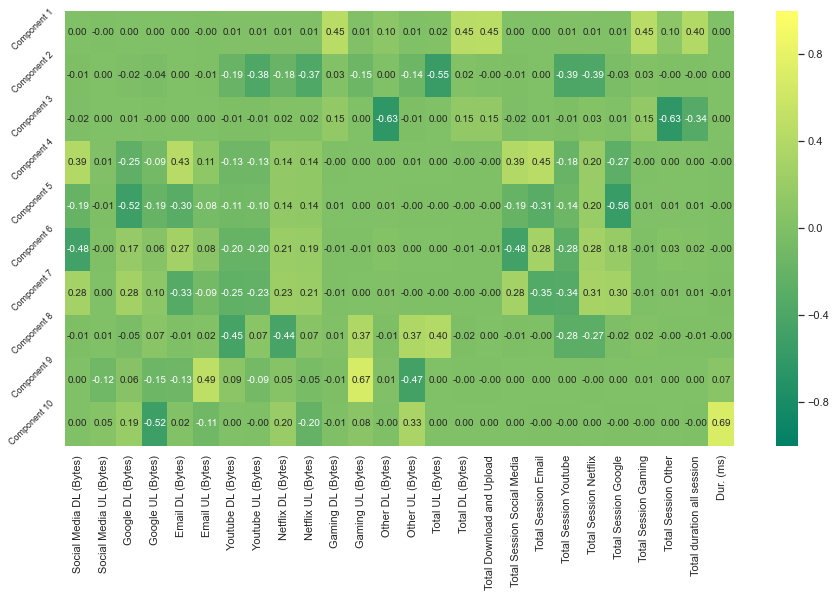

In [176]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'summer',
            annot = True,
           fmt='.2f')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
           ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6',
           'Component 7', 'Component 8', 'Component 9', 'Component 10'],
           rotation = 45,
           fontsize = 9)
plt.show()

#### Interpretation
<ul>
    <li>26 columns were selected which include Download and Upload session for each app and their sum total</li>
    <li>After PCA, 10 columns was selected as a result of higher variance of the data explained </li>
    <li>Total Download and Upload had a higher correlation with component 6 and Duration (ms) has the highest correlation with component 10. This means that</li>
    <li>Component 2 has the highest number of higher correlation with all other features in the data</li>
    </ul>

Interim Solution

In [103]:
df['xDR Session'] = df.groupby('MSISDN/Number')['Bearer Id'].transform('count')
df['session duration'] = df.groupby('MSISDN/Number')['Dur. (ms)'].transform('sum')

Task 1

In [117]:
def format_float(value):
    return f'{value:,.2f}'

pd.options.display.float_format = format_float

In [118]:
cols = ['xDR Session', 'session duration', 'Total Download and Upload', 'Total Session Email',
        'Total Session Gaming', 'Total Session Other', 'Total Session Google', 
        'Total Session Social Media', 'Total Session Youtube', 'Total Session Netflix']

df[cols].describe()


,xDR Session,session duration,Total Download and Upload,Total Session Email,Total Session Gaming,Total Session Other,Total Session Google,Total Session Social Media,Total Session Youtube,Total Session Netflix
count,"150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00"
mean,9.66,"798,652.26","495,764,636.37","2,259,102.31","430,333,100.71","429,365,343.62","7,807,294.55","1,828,250.21","22,643,482.64","22,628,606.54"
std,91.54,"6,871,454.44","244,381,801.65","1,071,112.63","244,020,737.42","243,268,884.19","3,516,431.96","1,035,649.59","9,246,831.13","9,260,850.96"
min,1.00,"7,142.00","28,956,107.00","8,359.00","306,358.00","149,045.00","40,330.00","1,563.00","78,903.00","98,432.00"
25%,1.00,"86,310.75","284,475,924.00","1,359,343.00","218,727,371.00","218,550,899.25","4,943,592.00","932,213.25","15,998,460.50","15,979,437.25"
50%,1.00,"139,854.50","496,861,101.50","2,263,574.00","431,615,155.50","429,992,278.00","7,812,852.50","1,826,442.00","22,661,814.00","22,635,588.50"
75%,2.00,"253,312.00","706,505,882.25","3,159,824.75","641,416,114.00","639,928,083.50","10,682,849.25","2,727,489.00","29,292,658.00","29,290,604.25"
max,"1,083.00","81,238,323.00","955,984,776.00","4,518,036.00","859,202,784.00","859,520,934.00","15,528,782.00","3,650,861.00","45,190,078.00","45,198,153.00"


In [162]:
df.to_csv('Task1.csv', index=False)